# Setting up an Experiment Baseline Framework

This serves as a baseline framework for the multi-label neural NILM experiments.

### Import Python Modules

In [1]:
from __future__ import print_function, division
import warnings

warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')


from data import Environment, get_on_off
from data.generator import Seq2Seq, Seq2Point 

from models import FCN, ResNet, ConvGRU, ConvLSTM, FCN_AE

from experiments import Experiment
from experiments.metrics import validation_report, evaluation_report, confusion_matrix_report, roc_report

from utils.path_finder import NILMTK_SOURCE, SCENARIOS, SOURCES, PRETRAINED, RESULTS

In [2]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Setup the Experiment Params

In [3]:
SCENARIO = 1
BATCH_SIZE = 32
WINDOW_SIZE = 100
EPOCHS = 100
LRN_RATE = 0.0001
SPEED = 1

In [34]:
CLASSIFIERS = {"FCN": FCN(1,3), 
               "ResNet": ResNet(1,3), 
               "ConvGRU": ConvGRU(1,3), 
               "ConvLSTM": ConvLSTM(1,3), 
               "FCN_AE":FCN_AE(1,3)
              }

In [7]:
experiment = Experiment(scenario=SCENARIO)
experiment.setup_running_params(model=ConvLSTM(1,3), epochs=EPOCHS, window=WINDOW_SIZE, batch_size=BATCH_SIZE, lrn_rate=LRN_RATE, speed=SPEED)

### Evaluate Experiment Outputs

In [36]:
measures = ['fridge', 'dish washer', 'washer dryer', 'macro', 'micro']  
metric = "F1 Score" 

target_results = {}
model_results = {}


for name in CLASSIFIERS.keys():


    target_filename = os.path.join(RESULTS, "scenario-{}/{}/{}-min-target-results.csv".format(experiment.scenario, name, experiment.window))
    target_results[name] = pd.read_csv(target_filename, index_col=0)

    model_filename = os.path.join(RESULTS, "scenario-{}/{}/{}-min-model-results.csv".format(experiment.scenario, name, experiment.window))
    model_results[name] = pd.read_csv(model_filename, index_col=0)

In [60]:
scores = {}
for name in CLASSIFIERS.keys():
    
    scores[name] = {}
    
    for i in measures:
        
        if i == "macro":
            scores[name][i] = model_results[name].loc[i, metric]
        else:
            scores[name][i] = target_results[name].loc[i, metric]

In [93]:
all_targets = pd.DataFrame(data=scores, columns=CLASSIFIERS.keys(), index=measures)
all_model = pd.DataFrame(data=scores, columns=["fridge", "dish washer", "washer dryer"], index=CLASSIFIERS.keys())

In [94]:
all_targets

,FCN,ResNet,ConvGRU,ConvLSTM,FCN_AE
fridge,0.799234,0.790737,0.804870,0.797297,0.802792
dish washer,0.665922,0.676243,0.662921,0.723187,0.699010
washer dryer,0.868598,0.880345,0.874585,0.881530,0.879794
macro,0.777918,0.782442,0.780792,0.800671,0.793865


In [83]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette(['#90BE6D','#652A75', '#8DDCA4','#231651', '#EA9010'])

<Figure size 648x288 with 0 Axes>

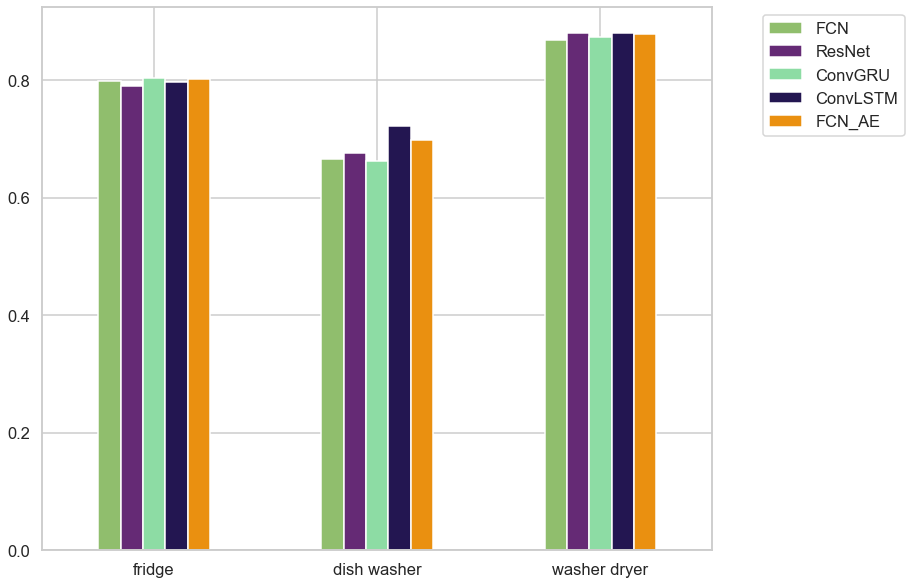

In [84]:
plt.figure(figsize=(9, 4));
ax = all_targets.plot.bar(rot=0);
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1));